In [2]:
import numpy as np
from sklearn import svm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from skimage.io import imread
from skimage.transform import resize
import os

In [3]:
# Specify the path to the dataset directory
dataset_path = r"dataset\training_set\training_set"

# Initialize lists to store the image data and corresponding labels
images = []
labels = []

# Process the cat images
cat_path = os.path.join(dataset_path, "cats")
for image_name in os.listdir(cat_path):
    image_path = os.path.join(cat_path, image_name)
    img = imread(image_path)
    img_resized = resize(img, (150, 150))  # Resize the image to a fixed size
    images.append(img_resized.flatten())  # Flatten the image and add it to the list
    labels.append(0)  # Assign label 0 to cats

# Process the dog images
dog_path = os.path.join(dataset_path, "dogs")
for image_name in os.listdir(dog_path):
    image_path = os.path.join(dog_path, image_name)
    img = imread(image_path)
    img_resized = resize(img, (150, 150))  # Resize the image to a fixed size
    images.append(img_resized.flatten())  # Flatten the image and add it to the list
    labels.append(1)  # Assign label 1 to dogs

# Convert the lists to numpy arrays
images = np.array(images)
labels = np.array(labels)


In [4]:
# Flatten the images and labels before splitting the dataset
flattened_images = images.reshape(images.shape[0], -1)

In [5]:
# Reduce the dimensionality of the image data using PCA

pca = PCA(n_components=2)
images_pca = pca.fit_transform(images)

In [6]:
#split dataset into testing and training datasets

X_train, X_test, y_train, y_test = train_test_split(images_pca, labels, test_size=0.2, random_state=42)


In [7]:
# Create an SVM classifier
svm_model = svm.SVC(kernel='linear')

# Train the model
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

In [8]:
# Make predictions on the test set
y_pred = svm_model.predict(X_test)

Precision: 0.4988662131519274
Recall: 0.583554376657825
F1 Score: 0.5378973105134474
Accuracy: 0.5280898876404494
Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.48      0.52       424
           1       0.50      0.58      0.54       377

    accuracy                           0.53       801
   macro avg       0.53      0.53      0.53       801
weighted avg       0.53      0.53      0.53       801

Confusion Matrix:


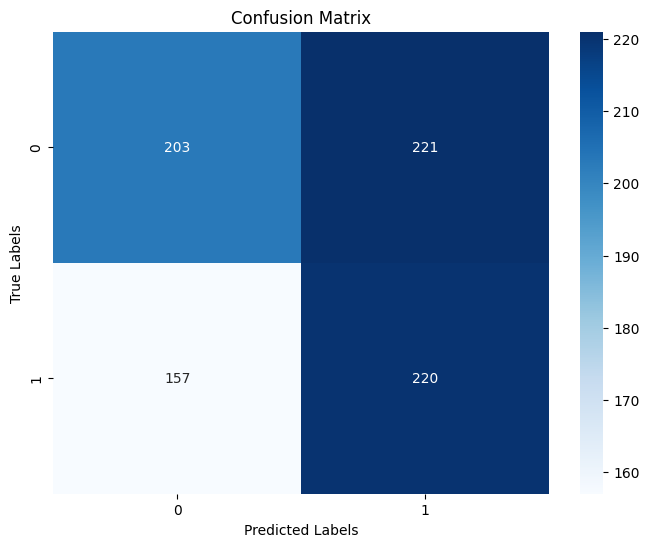

In [9]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns

# Calculate precision, recall, F1 score and accuracy
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Accuracy:", accuracy)

# Generate a classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

# Calculate confusion matrix
y_pred_binary = np.where(y_pred > 0.5, 1, 0)
cm = confusion_matrix(y_test, y_pred_binary)
print("Confusion Matrix:")

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

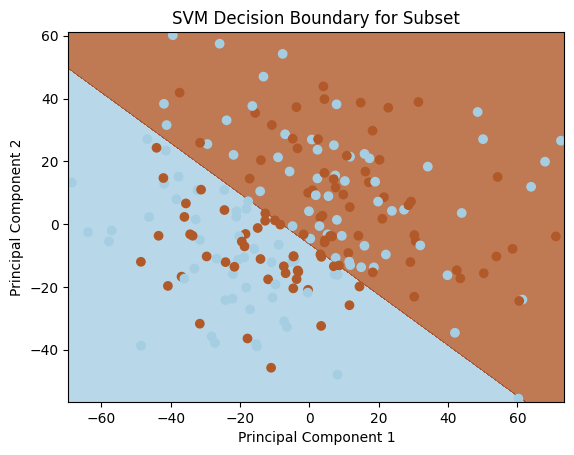

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Subset of the dataset you want to plot
X_subset = X_test[:200]
y_subset = y_test[:200]


# Predict labels for the subset using the trained model
y_pred_subset = svm_model.predict(X_subset)

# Define the boundaries of the plot
x_min, x_max = X_subset[:, 0].min() - 1, X_subset[:, 0].max() + 1
y_min, y_max = X_subset[:, 1].min() - 1, X_subset[:, 1].max() + 1

# Create a meshgrid of points
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Obtain the predicted labels for each point in the meshgrid
Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])

# Reshape the predictions to match the meshgrid shape
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

# Plot the subset data points
plt.scatter(X_subset[:, 0], X_subset[:, 1], c=y_subset, cmap=plt.cm.Paired)

# Set plot limits and show the plot
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('SVM Decision Boundary for Subset')
plt.show()
